In [1]:
import numpy as np
import csv
import pandas as pd 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import importlib
import re
from os import path
import gzip
from collections import defaultdict
import networkx as nx
import seaborn as sns
from matplotlib import rcParams
from datetime import date
from datetime import datetime

In [2]:
df = pd.read_csv('Data_API.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,4,6,8,9,10,14,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games
5,NaN,43107083.0,0x986ecc59dc28e84ad987a52e4a4fdade67d1fbb5f81b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=116&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '43107083.0')",Godsunchained,Games
6,NaN,7713824.0,0x72c1bfec2a020b5cb55ee3fc2f8ae1e66568ec881f62...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=190&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '7713824.0')",Godsunchained,Games
7,NaN,45951791.0,0x34baab28115bdadbcbc50846220060bb8e516f754c3b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=173&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '45951791.0')",Godsunchained,Games
8,NaN,5400581.0,0xf52ba58317f3ab62fb43da3e9d417fe4fa88bff86d9c...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:28,NaN,"('Godsunchained', '5400581.0')",Godsunchained,Games
9,NaN,117891743.0,0xb70b159f02200125a258726694299931a8c69651053d...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:50,NaN,"('Godsunchained', '117891743.0')",Godsunchained,Games


In [4]:
df.tail(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
4495559,0x06012c8cf97bead5deae237070f9587f8e7a266d,973739,0xb96d97cb0800295a0f62b6d1897a39b4794ac3ef1559...,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,0x4FabDA,0x0aa9e616a097627b71e499e5c464e294d15e26aa,Merlion,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,...,🎗 Common Gen 1 Mewt,Namaste. I'm 🎗 Common Gen 1 Mewt. I feel like ...,Cryptokitties,OpenSea,2019-06-07 00:00:00,2019-06-07 01:00:48,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '973739')",Cryptokittie,Art
4495560,0x31af195db332bc9203d758c74df5a5c5e597cdb7,15905,0xf6759f042276ec3394904e8f57f0bee484867add9b97...,0x1e0a8bcab64489766cd96f3e29d91f1717d168a2,0x1e0a8bcab64489766cd96f3e29d91f1717d168a2,0x69a67822df2801f4a7cdd419f5e6585bbf8db4f4,jt,https://storage.opensea.io/0x31af195db332bc920...,https://cryptoassault.io/units/unit_18.png,https://storage.opensea.io/0x31af195db332bc920...,...,Common Falcon #15905,Strong against helis & tanks\n\nWeak against m...,Cryptoassault,OpenSea,2019-06-07 00:00:00,2019-06-07 00:59:26,https://opensea.io/assets/0x31af195db332bc9203...,"('Cryptoassault', '15905')",Cryptoassault,Other
4495561,0xd73be539d6b2076bab83ca6ba62dfe189abc6bbe,75307,0x94778873024077f1909475d7edbdf1d2a79bb0fc40f1...,0x80e7e06f096380dd0d3f9cec4fdece370db4cdbd,Sotech,0xcc7cf01aa54726245764bbd9a53e896520f22ef6,chronor,https://storage.opensea.io/0xd73be539d6b2076ba...,https://blockchaincuties.co/rest/svga/13/75307...,https://blockchaincuties.co/rest/svga/13/75307...,...,Good Life,NaN,Blockchaincuties,OpenSea,2019-06-07 00:00:00,2019-06-07 00:58:33,https://opensea.io/assets/0xd73be539d6b2076bab...,"('Blockchaincuties', '75307')",Block,Collectible
4495562,0x1276dce965ada590e42d62b3953ddc1ddceb0392,33155,0xb03e7da17461ecfe0c25d33af92fd0a6d37567ca9d19...,0x02d388e416a977b09e31b36aeb7ead15248bc852,Discordia,0xdf0635793e91d4f8e7426dbd9ed08471186f428d,WalletTest1,https://storage.opensea.io/0x1276dce965ada590e...,https://s3.amazonaws.com/neon-district-founder...,https://storage.opensea.io/0x1276dce965ada590e...,...,Pistol,NaN,Neon-district,OpenSea,2019-06-07 00:00:00,2019-06-07 00:57:25,https://opensea.io/assets/0x1276dce965ada590e4...,"('Neon-district', '33155')",Neon,Games
4495563,0x06012c8cf97bead5deae237070f9587f8e7a266d,1538764,0xa91ae19b93c288d3cf0ab3ced42a2485586f999e5c82...,0x4fabda075e15e9245ed7cfb5db398b4683bfcf54,0x4FabDA,0x491fd53e5e0d8b4a5f28d008856060cda5380aaf,jonnyrevolution,https://lh3.googleusercontent.com/QUlE6jFq6dRY...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://lh3.googleusercontent.com/QUlE6jFq6dRY...,...,🂡 Kotkasi 🂡,"Welcome, I'm 🂡 Kotkasi 🂡. Wait! No, let me sta...",Cryptokitties,OpenSea,2019-06-07 00:00:00,2019-06-07 00:54:53,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '1538764')",Cryptokittie,Art
4495564,0xdceaf1652a131f32a821468dc03a92df0edd86ea,30030096,0x8611ff334af847630b47b7067d97994765a70932121c...,0xcc0b13b539c8c08817868a9855e40ff7fb8df92d,sukiyakiman,0x8cb09026212c7bf2e906bb8248ad5826bd55e35b,NaN,https://lh3.googleusercontent.com/-bv5Qhhs3EpZ...,https://www.mycryptoheroes.net/images/extensio...,https://lh3.googleusercontent.com/-bv5Qhhs3EpZ...,...,MCH Extension: #30030096 Lv.80,"Extensions are unique weapons, originated from...",Mycryptoheroes,OpenSea,2019-06-07 00:00:00,2019-06-07 00:54:41,https://opensea.io/assets/0xdceaf1652a131f32a8...,"('Mycryptoheroes', '30030096')",Mycrypto,Games
4495565,0x31af195db332bc9203d758c74df5a5c5e597cdb7,20455,0xec8616978e73a31dcf5c73720110c86b970ffde3e3ea...,0x1e0a8bcab64489766cd96f3e29d91f1717d168a2,0x1e0a8bcab64489766cd96f3e29d91f1717d168a2,0x69a67822df2801f4a7cdd419f5e65

In [5]:
len(df)

4495569

In [6]:
df.columns

Index(['Smart_contract', 'ID_token', 'Transaction_hash', 'Seller_address',
       'Seller_username', 'Buyer_address', 'Buyer_username', 'Image_url_1',
       'Image_url_2', 'Image_url_3', 'Image_url_4', 'Price_Crypto', 'Crypto',
       'Price_USD', 'Name', 'Description', 'Collection', 'Market',
       'Datetime_updated', 'Datetime_updated_seconds', 'Permanent_link',
       'Unique_id_collection', 'Collection_cleaned', 'Category'],
      dtype='object')

<AxesSubplot:>

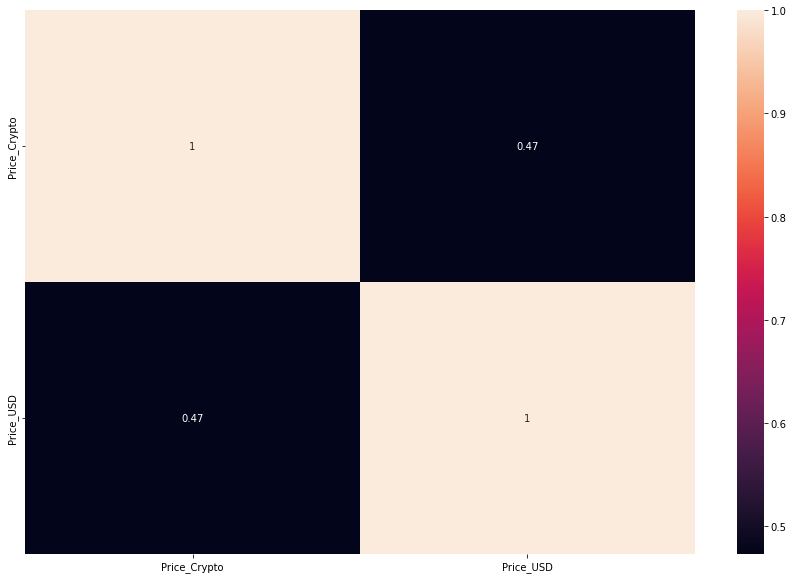

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)

In [8]:
df['index'] = np.arange(len(df))

### EDA - Category

In [9]:
df["Category"].unique()

array(['Games', 'Art', 'Other', 'Collectible', 'Metaverse', 'Utility',
       nan], dtype=object)

In [10]:
summary_data = df.groupby('Category').count()
summary_data[['index']]

,index
Category,
Art,1068840
Collectible,1252203
Games,1956215
Metaverse,32014
Other,185791
Utility,505


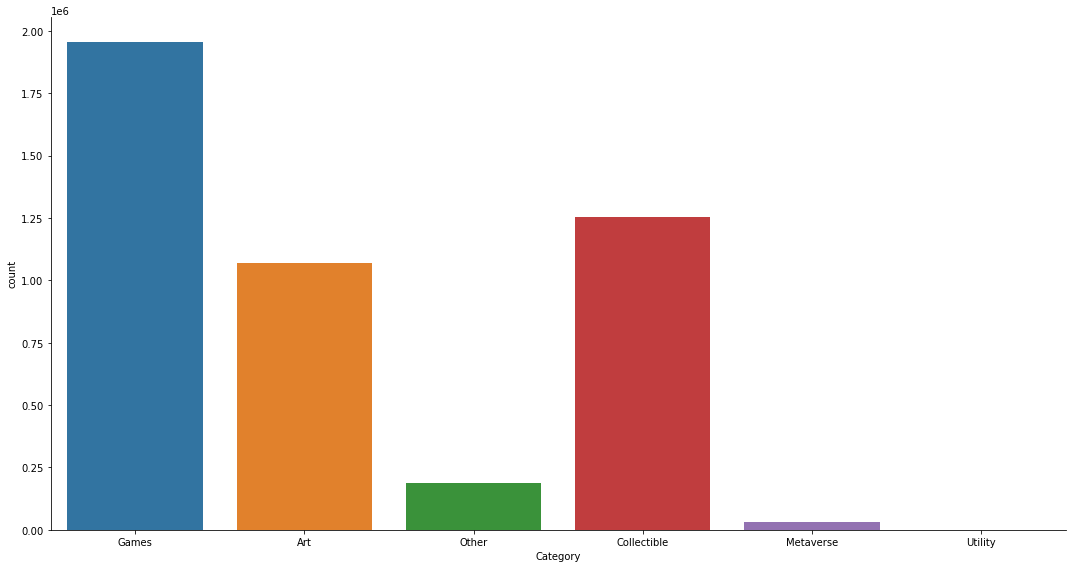

In [11]:
sns.catplot(x="Category", kind="count", data=df, height=8, aspect=15/8)

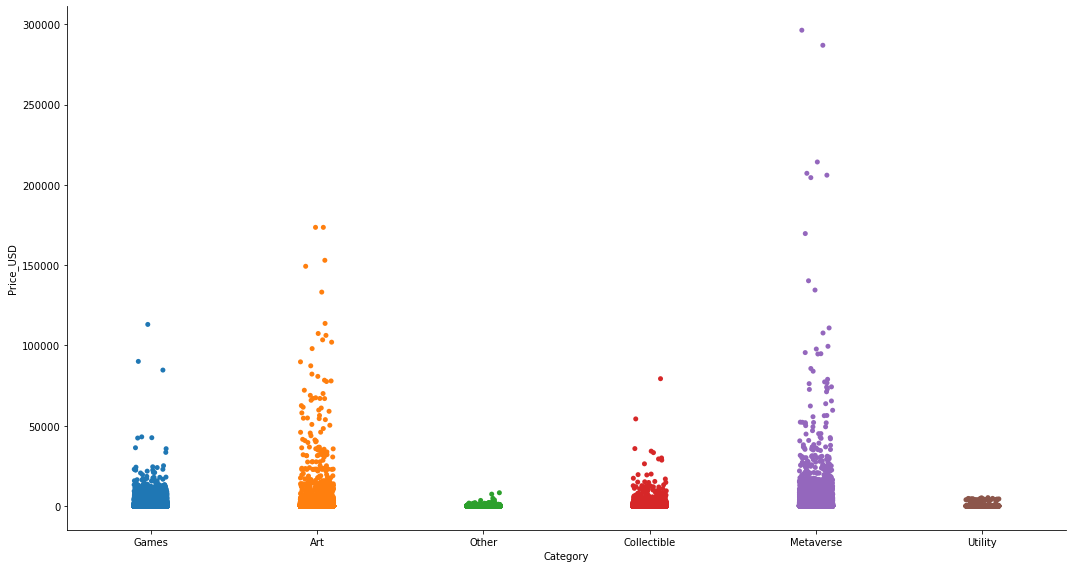

In [12]:
sns.catplot(x="Category", y="Price_USD", data=df, height=8, aspect=15/8)

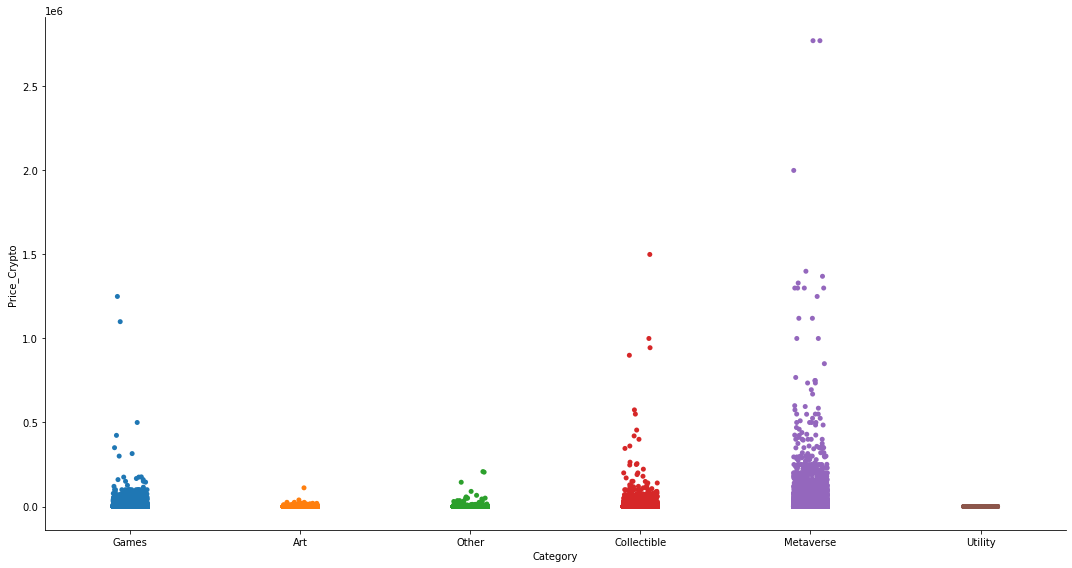

In [13]:
sns.catplot(x="Category", y="Price_Crypto", data=df, height=8, aspect=15/8)

### EDA - Market

In [14]:
df["Market"].unique()

array(['Godsunchained', 'Cryptokitties', 'Atomic', 'Decentraland',
       'OpenSea', nan], dtype=object)

In [15]:
summary_data = df.groupby('Market').count()
summary_data[['index']]

,index
Market,
Atomic,3185292
Cryptokitties,725400
Decentraland,16863
Godsunchained,236210
OpenSea,331803


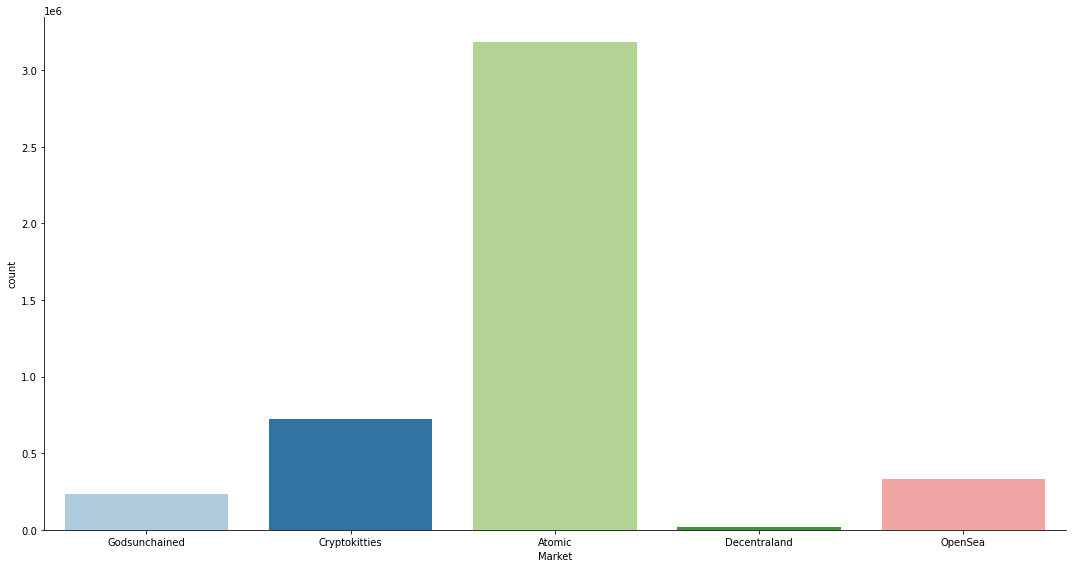

In [16]:
sns.set_palette("Paired")
sns.catplot(x="Market", kind="count", data=df, height=8, aspect=15/8)

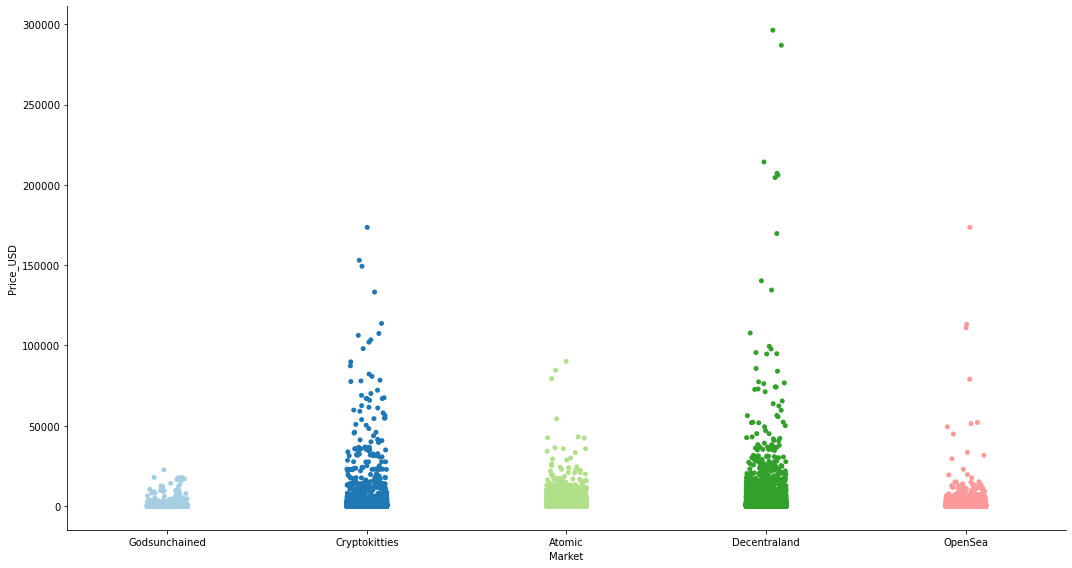

In [17]:
sns.catplot(x="Market", y="Price_USD", data=df, height=8, aspect=15/8)

### EDA - Crypto

In [18]:
df["Crypto"].unique()

array(['ETH', 'WAX', 'MANA', 'WETH', 'BZN', 'USDC', 'SAI', 'EMONT', 'IMP',
       'NVT', 'LESS', 'GUSD', 'ENJ', 'ELET', 'WCK', nan], dtype=object)

In [19]:
summary_data = df.groupby('Crypto').count()
summary_data[['index']]

,index
Crypto,
BZN,2
ELET,5
EMONT,167
ENJ,1
ETH,1284689
GUSD,9
IMP,105
LESS,383
MANA,20362


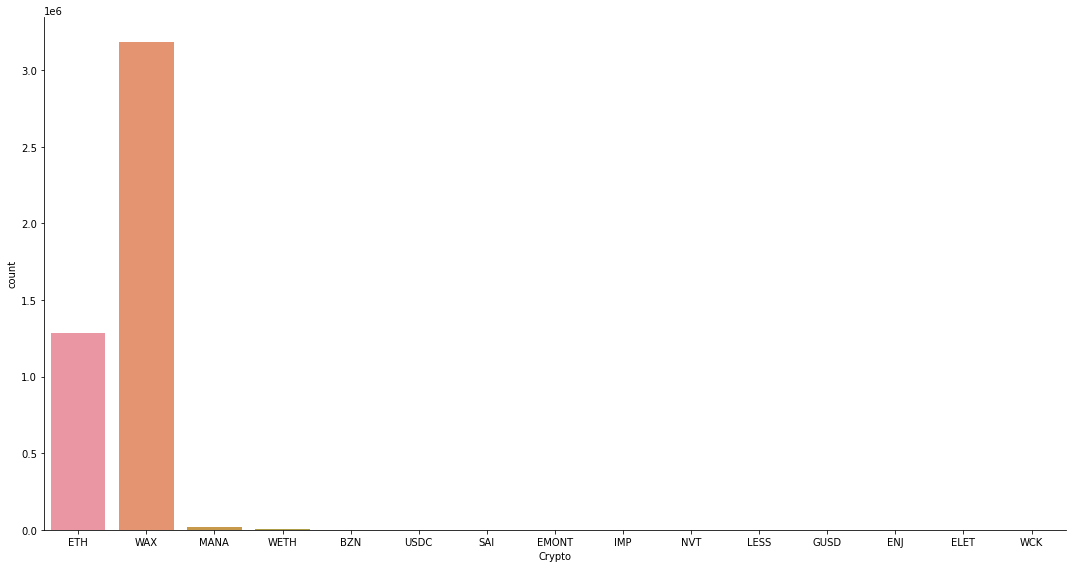

In [20]:
sns.catplot(x="Crypto", kind="count", data=df, height=8, aspect=15/8)

### EDA - Collection Cleaned

In [21]:
df["Collection_cleaned"].unique()

array(['Godsunchained', 'Cryptokittie', 'Oghodlergang', ...,
       'Conniedigital', 'Cryptoser', nan], dtype=object)

In [22]:
summary_data = df.groupby('Collection_cleaned').count()
summary_data[['index']]

,index
Collection_cleaned,
Abrehmiii,9
Abstract,51
Abstrametric,6
Absurd,11
Acebgznft,203
...,...
Zlfhomedecor,14
Zodiac,16
Zombie,1285


### EDA - Price USD

In [23]:
df['Price_USD'].describe()

count    4.494361e+06
mean     2.279687e+01
std      5.442183e+02
min      1.514250e-16
25%      1.712280e-01
50%      8.625235e-01
75%      4.885000e+00
max      2.963550e+05
Name: Price_USD, dtype: float64

In [24]:
np.mean(df['Price_USD'])

22.796873434329655

In [25]:
max(df['Price_USD'])

296355.0

In [26]:
min(df['Price_USD'])

1.5142500000000002e-16

<AxesSubplot:xlabel='Price_USD'>

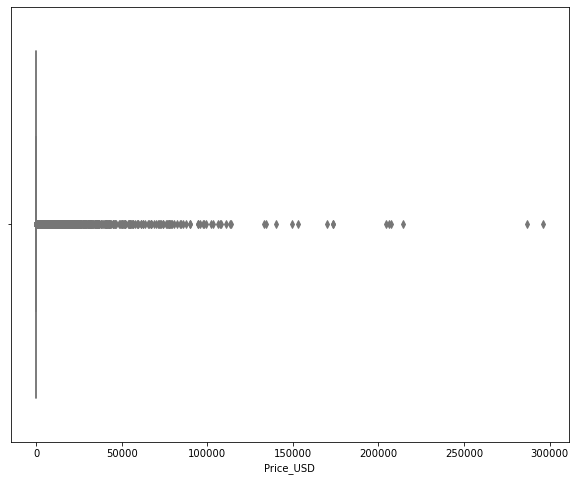

In [27]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Price_USD', data = df)

In [28]:
cheap_nft = df.loc[(df['Price_USD'] <= 10)]
cheap_nft.head(10)

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games,0
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games,1
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games,2
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:59:33,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games,3
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games,4
5,NaN,43107083.0,0x986ecc59dc28e84ad987a52e4a4fdade67d1fbb5f81b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=116&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '43107083.0')",Godsunchained,Games,5
6,NaN,7713824.0,0x72c1bfec2a020b5cb55ee3fc2f8ae1e66568ec881f62...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=190&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '7713824.0')",Godsunchained,Games,6
7,NaN,45951791.0,0x34baab28115bdadbcbc50846220060bb8e516f754c3b...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=173&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:44,NaN,"('Godsunchained', '45951791.0')",Godsunchained,Games,7
8,NaN,5400581.0,0xf52ba58317f3ab62fb43da3e9d417fe4fa88bff86d9c...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c5968ee5ce21ad7324c97014fcb99f87f7fec6f,NaN,https://card.godsunchained.com/?id=27&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:58:28,NaN,"('Godsunchained', '5400581.0')",Godsunchained,Games,8
9,NaN,117891743.0,0xb70b159f02200125a258726694299931a8c69651053d...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,Godsunchained,Godsunchained,2019-11-30 00:00:00,2019-11-30 23:57:50,NaN,"('Godsunchained', '117891743.0')",Godsunchained,Games,9


In [29]:
len(cheap_nft)

3702979

<AxesSubplot:xlabel='Price_USD'>

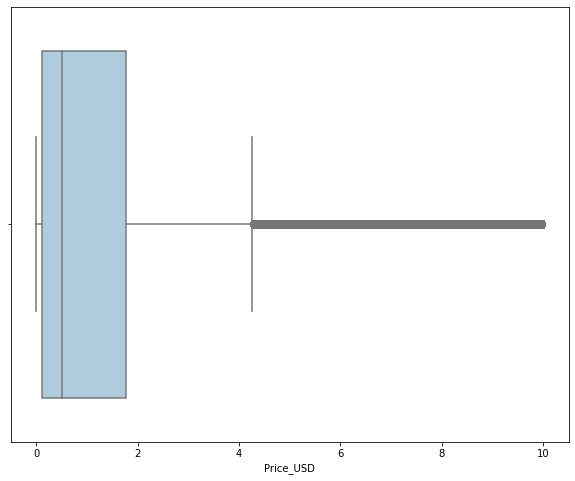

In [30]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Price_USD', data = cheap_nft)

<AxesSubplot:xlabel='Price_USD', ylabel='Count'>

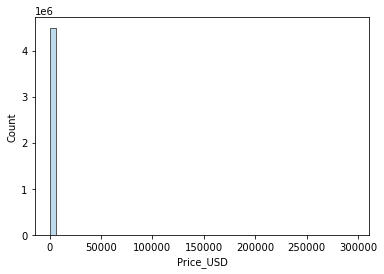

In [31]:
sns.histplot(data=df, x="Price_USD", bins = 50)

<AxesSubplot:xlabel='Datetime_updated'>

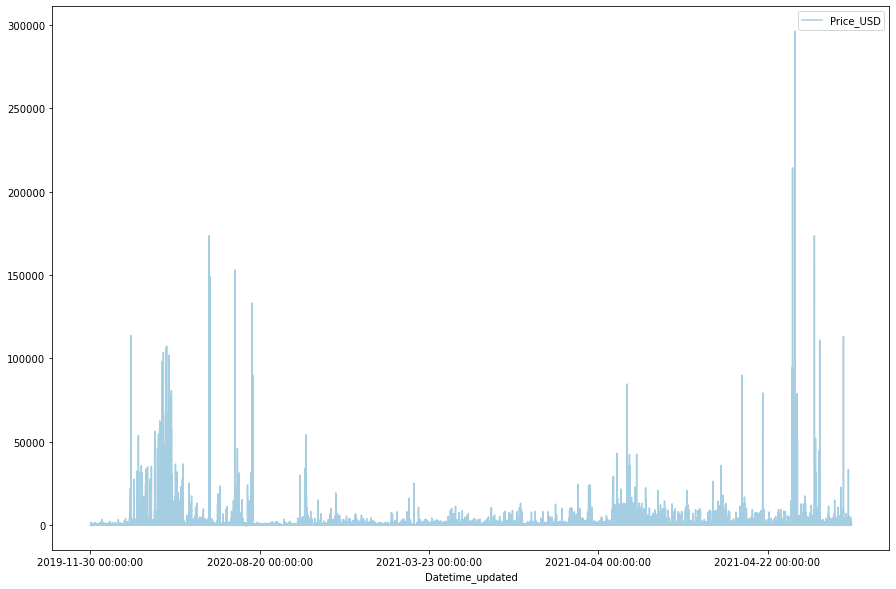

In [32]:
df.plot( 'Datetime_updated' , 'Price_USD', figsize=(15, 10) )

In [33]:
df['Log_Price_USD'] = np.log(df['Price_USD'])

<AxesSubplot:xlabel='Log_Price_USD'>

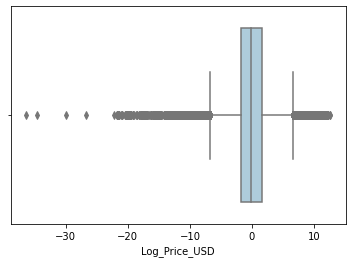

In [34]:
sns.boxplot(x = 'Log_Price_USD', data = df)

<AxesSubplot:xlabel='Log_Price_USD', ylabel='Count'>

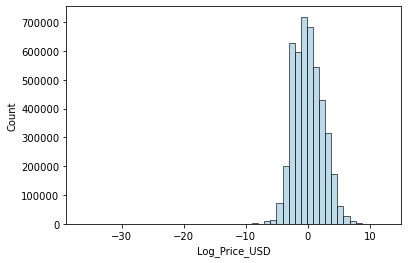

In [35]:
sns.histplot(data=df, x="Log_Price_USD", bins = 50)

<AxesSubplot:xlabel='Datetime_updated'>

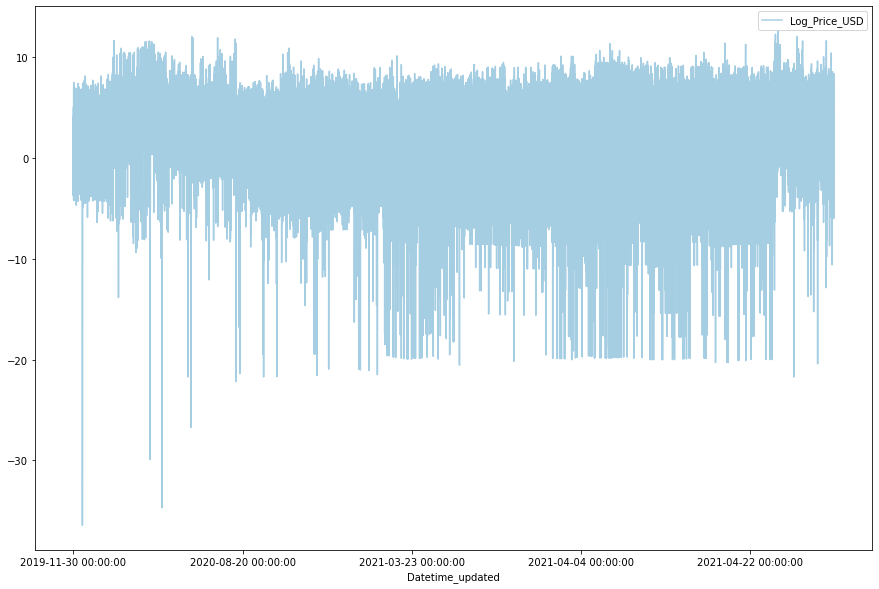

In [36]:
df.plot( 'Datetime_updated' , 'Log_Price_USD', figsize=(15, 10) )

### EDA - Price Crypto

<AxesSubplot:xlabel='Price_Crypto'>

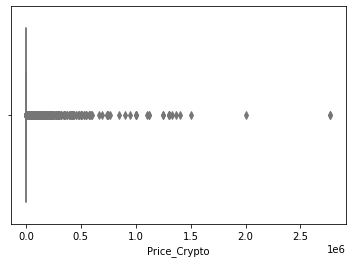

In [37]:
sns.boxplot(x = 'Price_Crypto', data = df)

<AxesSubplot:xlabel='Price_Crypto', ylabel='Count'>

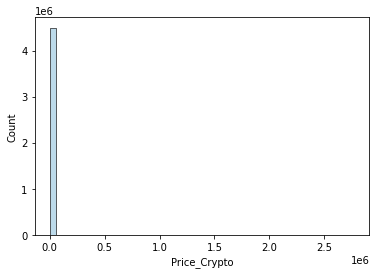

In [38]:
sns.histplot(data=df, x="Price_Crypto", bins = 50)

<AxesSubplot:xlabel='Datetime_updated'>

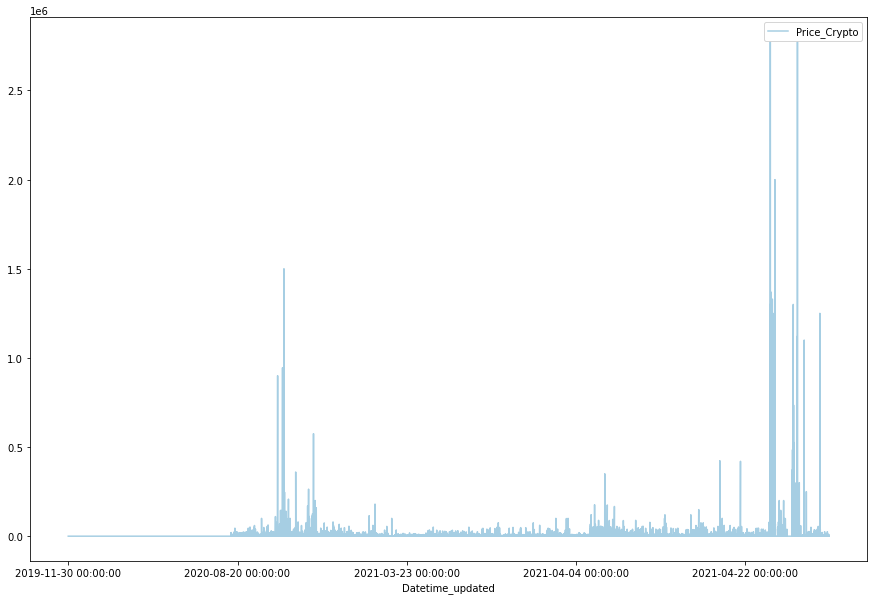

In [39]:
df.plot( 'Datetime_updated' , 'Price_Crypto', figsize=(15, 10) )

In [41]:
np.seterr(divide = 'ignore') 
df['Log_Price_Crypto'] = np.log(df['Price_Crypto'])

<AxesSubplot:xlabel='Log_Price_Crypto'>

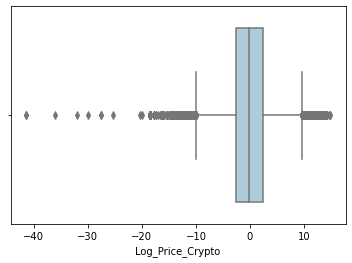

In [42]:
sns.boxplot(x = 'Log_Price_Crypto', data = df)

<AxesSubplot:xlabel='Log_Price_Crypto', ylabel='Count'>

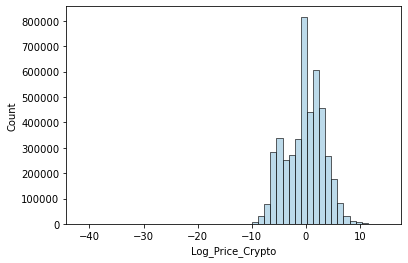

In [43]:
sns.histplot(data=df, x="Log_Price_Crypto", bins = 50)

<AxesSubplot:xlabel='Datetime_updated'>

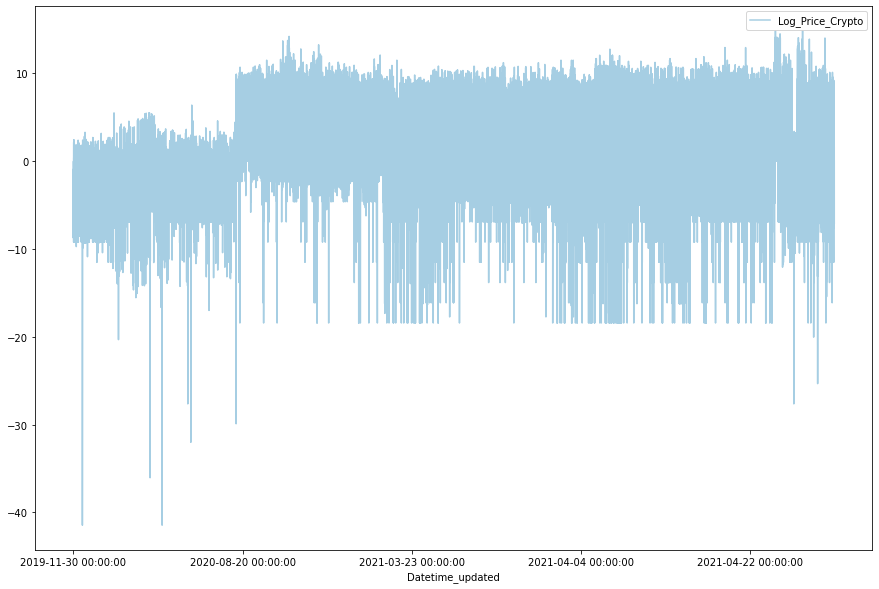

In [44]:
df.plot( 'Datetime_updated' , 'Log_Price_Crypto', figsize=(15, 10) )

In [45]:
np.seterr(divide = 'warn') 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### EDA - Date

In [46]:
df['Date'] = pd.to_datetime(df['Datetime_updated'])

In [47]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [48]:
df['Year'] = np.nan_to_num(df['Year']).astype(int)
df['Month'] = np.nan_to_num(df['Month']).astype(int)

In [49]:
df.head()

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Log_Price_USD,Log_Price_Crypto,Date,Year,Month
0,NaN,87094722.0,0xed9ff1c311a611e5c457ce0a49bbbb7ed55efca98842...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,"('Godsunchained', '87094722.0')",Godsunchained,Games,0,-3.496014,-8.517193,2019-11-30,2019,11
1,NaN,73044643.0,0xbc8412594ffa7382e8306215ece5b4e041fc641b1813...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=79&q=4,NaN,NaN,...,NaN,"('Godsunchained', '73044643.0')",Godsunchained,Games,1,-1.624212,-6.645391,2019-11-30,2019,11
2,NaN,17107482.0,0x92672baf5e9e23de230dee8e57ddf443ab6d5a336341...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0xe0fb7622091e3d9ef9b438471b10b9ea88c7cf6b,NaN,https://card.godsunchained.com/?id=33&q=4,NaN,NaN,...,NaN,"('Godsunchained', '17107482.0')",Godsunchained,Games,2,-3.496014,-8.517193,2019-11-30,2019,11
3,NaN,82230857.0,0x3d157249e3083622c2d756f07a05caa3a76687288b32...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=227&q=4,NaN,NaN,...,NaN,"('Godsunchained', '82230857.0')",Godsunchained,Games,3,-1.098118,-6.119298,2019-11-30,2019,11
4,NaN,40925443.0,0xa892b3569dc8e6b3c7db93aade62372637ebbc61fb63...,0x76481caa104b5f6bccb540dae4cefaf1c398ebea,NaN,0x2c00d05ff7ffe93d77145dfe12aa56e622ae6f40,NaN,https://card.godsunchained.com/?id=62&q=4,NaN,NaN,...,NaN,"('Godsunchained', '40925443.0')",Godsunchained,Games,4,-1.704254,-6.725434,2019-11-30,2019,11


In [50]:
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].replace('0', np.nan)
df['Month'] = df['Month'].astype(int)
df['Month'] = df['Month'].replace('0', np.nan)

In [51]:
df['Year'].unique()

array(['2019', '2020', '2021', '2017', '2018', nan], dtype=object)

In [52]:
df['Year'] = pd.Categorical(df['Year'], ['2017','2018','2019','2020','2021'])

In [53]:
df['Month'].unique()

array([11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0])

<AxesSubplot:xlabel='Year', ylabel='Count'>

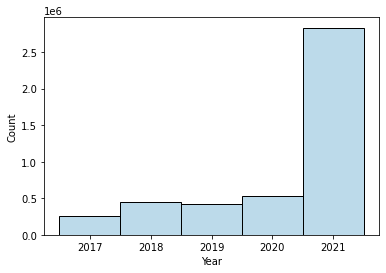

In [54]:
sns.histplot(data=df, x="Year", bins = 6)

### Buyer/Seller Network EDA
- Seller_address & Buyer_address

In [55]:
# creates dictionary objects to reresent the relations for a given seller/buyer
    # based on the listed seller/buyer in a single transaction (row)
# ie seller1 = {buyer1, buyer2, buyer3}
# ie buyer87 = {seller34,seller61,seller40}

# also includes same logic for transaction seller/buyer category

sellerBuyers = defaultdict(list)
buyerSellers = defaultdict(list)
sellerCategory = defaultdict(list)
buyerCategory = defaultdict(list)

seller,buyer,category = df['Seller_address'],df['Buyer_address'],df['Category']

for i in range(0,len(df)):
    sellerBuyers[seller[i]].append(buyer[i])
    buyerSellers[buyer[i]].append(seller[i])
    sellerCategory[seller[i]].append(category[i])
    buyerCategory[buyer[i]].append(category[i])

In [56]:
# get top 10 sellers - can change amount by adjusting index value
# this step will still sort sellers from most to least
top_sellers_counts = df['Seller_address'].value_counts()[:10] #can update value HERE
top_sellers = top_sellers_counts.index.tolist()
top_sellers_counts

0x76481caa104b5f6bccb540dae4cefaf1c398ebea    192586
0xfc624f8f58db41bdb95aedee1de3c1cf047105f1     36447
0x4fabda075e15e9245ed7cfb5db398b4683bfcf54     34696
0x4ef40d1bf0983899892946830abf99eca2dbc5ce     28600
yqzam.wam                                      27675
0xa21037849678af57f9865c6b9887f4e339f6377a     24732
0xb367b96bd9af396dc5281cfdcd9e9571f670832f     17478
52cbg.wam                                      16551
pmmqy.wam                                      16501
0x09191d18729da57a83a9afc8ace0c8d7d104e118     15441
Name: Seller_address, dtype: int64

In [57]:
# get top 10 buyers - can change amount by adjusting index value
# this step will still sort buyers from most to least
top_buyers_counts = df['Buyer_address'].value_counts()[:10] #can update value HERE
top_buyers = top_buyers_counts.index.tolist()
top_buyers_counts

unbaw.wam                                     16793
twmqw.wam                                     16263
0x9e6e344f94305d36ea59912b0911fe2c9149ed3e    16224
contractwork                                  14593
0x0008d343091ef8bd3efa730f6aae5a26a285c7a2    14007
ruk12.wam                                     11718
cneba.wam                                     11164
axvqu.wam                                     10678
svwqu.wam                                     10616
fvfqu.wam                                     10338
Name: Buyer_address, dtype: int64

In [58]:
# further index to top #1 seller/buyer
top_sellers_counts = df['Seller_address'].value_counts()[:1]
top_sellers = top_sellers_counts.index.tolist()

top_buyers_counts = df['Buyer_address'].value_counts()[:1]
top_buyers = top_buyers_counts.index.tolist()

In [59]:
# gets bottom 10 sellers - can change amount by adjusting index value
# this step will still sort sellers from least to most
#bottom_sellers_counts = df['Seller_address'].value_counts()[-10:] #can update HERE

# gets middle value sellers (more than just one connection - for current network viz)
    # did not update variable name or ease in following code
bottom_sellers_counts = df['Seller_address'].value_counts()[25001:25011] #can update HERE
bottom_sellers = bottom_sellers_counts.index.tolist()
bottom_sellers_counts

k4wbu.wam                                     15
0xd2541dcff5ac62d5addccd0d43537c3b834260b3    15
0x0ecca7629598754ccf905ce93b4fe33f04e7981b    15
tysb4.wam                                     15
0x3adaeb158e834771c74fd413bb3b9bb236d2354a    15
0xe756fb92822a86dc497655fb58588d21d9dda69a    15
j.h5a.wam                                     15
u.fr.wam                                      15
1utay.wam                                     15
nejqy.wam                                     15
Name: Seller_address, dtype: int64

In [60]:
# gets bottom 10 buyers - can change amount by adjusting index value
# this step will still sort buyers from least to most
#bottom_buyers_counts = df['Buyer_address'].value_counts()[-10:] #can update HERE

# gets middle value buyers (more than just one connection - for current network viz)
    # did not update variable name or ease in following code
bottom_buyers_counts = df['Buyer_address'].value_counts()[25001:25011] #can update HERE
bottom_buyers = bottom_buyers_counts.index.tolist()
bottom_buyers_counts

0x7f1c76b772ca7adb2f443037c342c21ecf8b9e59    17
2vgbc.wam                                     17
jvvry.wam                                     17
3.hr.wam                                      17
jb1qy.wam                                     17
0x3ba2635c7acc7a6ed1b0cd3af2fc50d08b354ec5    17
0x0017717025a85c22dff981f86f6728289fbd4619    17
t3cbi.wam                                     17
bimr.wam                                      17
oreba.wam                                     17
Name: Buyer_address, dtype: int64

In [61]:
# builds a df for network structure
    # each row represents a single seller/buyer relation

from_list = []
to_list = []
category = []
size = []

for my_seller in bottom_sellers:
#for k,v in productUsers.items():               
    #print("%s - %s" % (str(k), str(v)))
    #my_from = k
    my_from = my_seller
    #my_users = v
    my_buyers = sellerBuyers[my_seller]
    
    my_size = len(my_buyers)
    seller_categories = sellerCategory[my_seller]
    my_category = max(set(seller_categories), key = seller_categories.count)
    
    for buyer in my_buyers:
        my_tos = buyerSellers[buyer]
        
        for my_to in my_tos:
            from_list.append(my_from)
            to_list.append(my_to)
            category.append(my_category)
            size.append(my_size)

In [62]:
prod_df = pd.DataFrame({ 'from':from_list, 'to':to_list, 'category': category, 'size':size})
prod_df.head(10)

,from,to,category,size
0,k4wbu.wam,uxdbo.wam,Games,15
1,k4wbu.wam,ixmri.wam,Games,15
2,k4wbu.wam,d.tru.wam,Games,15
3,k4wbu.wam,zkrra.wam,Games,15
4,k4wbu.wam,jtaay.wam,Games,15
5,k4wbu.wam,15ybm.wam,Games,15
6,k4wbu.wam,wx3bq.wam,Games,15
7,k4wbu.wam,5gkre.wam,Games,15
8,k4wbu.wam,qogbk.wam,Games,15
9,k4wbu.wam,.5xba.wam,Games,15


In [63]:
len(prod_df)

149016

In [64]:
# create a list of our conditions
#categories = ['Art', 'Collectible', 'Games', 'Metaverse', 'Other', 'Utility']
conditions = [
    (prod_df['category'] == "Art"),
    (prod_df['category'] == "Collectible"),
    (prod_df['category'] == "Games"),
    (prod_df['category'] == "Metaverse"),
    (prod_df['category'] == "Other"),
    (prod_df['category'] == "Utility")
    ]

In [65]:
# Colors from earlier Cateogry Histogtram
    # Games        - Blue
    # Art          - Orange
    # Other        - Green
    # Collectible  - Red
    # Metaverse    - Purple
    # Utility      - Brown

# following the conditions order in previous step
values = ['tab:orange', 'tab:red', 'tab:blue', 'tab:purple', 'tab:green', 'tab:brown']

In [66]:
prod_df['color'] = np.select(conditions, values)

In [67]:
prod_df['color'].unique()

array(['tab:blue', 'tab:orange', 'tab:red'], dtype=object)

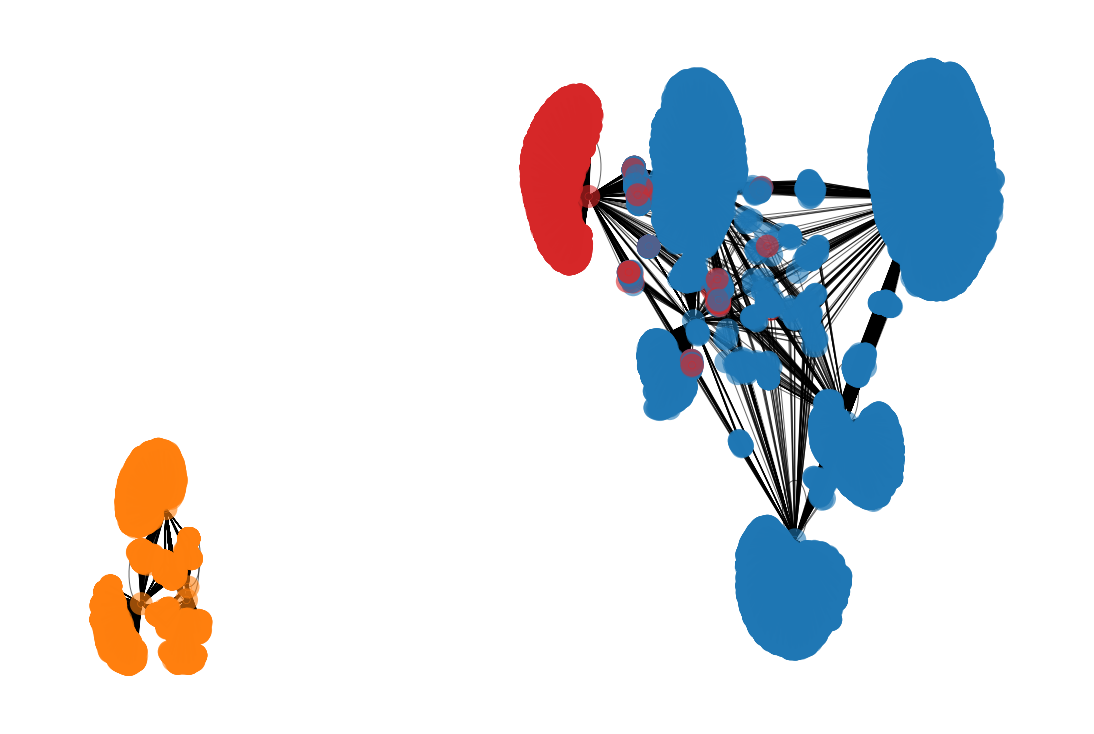

In [68]:
%matplotlib inline

plt.figure(figsize=(15,10))

# Build your graph
G=nx.from_pandas_edgelist(prod_df, 'from', 'to')

colors = []
sizes = []
for node in G:
    my_color = prod_df.loc[prod_df['to'] == node]['color'].values.tolist()
    my_c = max(set(my_color), key = my_color.count)
    colors.append(my_c)
    
    my_size = prod_df.loc[prod_df['to'] == node]['size'].values.tolist()
    my_s = max(set(my_size), key = my_size.count)
    #my_s = np.log(my_s+500) 
    sizes.append(my_s+50)
    

# Graph with Custom nodes:
nx.draw(G, 
        #with_labels=True, 
        node_size=sizes, 
        node_color=colors,
        #edgecolors=colors,
        #node_fill_color=colors,
        node_shape="o", 
        alpha=0.6, 
        linewidths=15)
plt.show()

### EDA - Washed NFTs

In [69]:
#there are listed transactions where the seller is also the buyer!
washed_nft = df.loc[(df['Seller_address'] == df['Buyer_address'])]
washed_nft.head(10)
#how to handle cycles?

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,...,Permanent_link,Unique_id_collection,Collection_cleaned,Category,index,Log_Price_USD,Log_Price_Crypto,Date,Year,Month
255400,NaN,413933.0,0x3916dc2872ffad5e0ad14c9c6bd85647a2f0322a0d3f...,0xc8f848f337a94bdc0a6d21a1b4376566868bf15f,NaN,0xc8f848f337a94bdc0a6d21a1b4376566868bf15f,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '413933')",Cryptokittie,Art,255400,4.980536,-2.525729,2017-12-27,2017,12
260563,NaN,229485.0,0xd54bdaf942227e2b838336cda433b8fbfca6593295b2...,0x36e37163422f265dc5d7407ac9a204fb8185253e,NaN,0x36e37163422f265dc5d7407ac9a204fb8185253e,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '229485')",Cryptokittie,Art,260563,2.790826,-4.828314,2017-12-26,2017,12
265892,NaN,397249,0xe9bf174d7396126d02ed3d821f2bf93ce25483b006b0...,0x2fe3fa35ad7c9a587906cc11adc8dbaf322920fa,NaN,0x2fe3fa35ad7c9a587906cc11adc8dbaf322920fa,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '397249')",Cryptokittie,Art,265892,3.032674,-3.442905,2017-12-24,2017,12
281875,NaN,351941,0x7b518ca7b813cbe90fdfaecbad13ad115287f2e72be6...,0x2fe3fa35ad7c9a587906cc11adc8dbaf322920fa,NaN,0x2fe3fa35ad7c9a587906cc11adc8dbaf322920fa,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '351941')",Cryptokittie,Art,281875,3.679445,-3.027710,2017-12-19,2017,12
314084,NaN,325058,0x586b024ba3ffea2c97c5338ece95580c918fe966aa63...,0xc0a4705ed21f42d4333a5b357635471e540354de,NaN,0xc0a4705ed21f42d4333a5b357635471e540354de,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '325058')",Cryptokittie,Art,314084,5.074011,-1.411555,2017-12-15,2017,12
366666,NaN,229795,0xc4d4ca7cd59ce5defa1bb4c159496d20d1d8ea5a0628...,0xa49c42de466eac7764f8ea7b5bfa1efc43bbb09b,NaN,0xa49c42de466eac7764f8ea7b5bfa1efc43bbb09b,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '229795')",Cryptokittie,Art,366666,2.979008,-3.506558,2017-12-11,2017,12
381350,NaN,183468,0x856b817608a331022cd498464ad601118f2ae6cefbe6...,0x5a65e1bcebd36e0cea91407937ce6de2ad417c83,NaN,0x5a65e1bcebd36e0cea91407937ce6de2ad417c83,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '183468')",Cryptokittie,Art,381350,3.224361,-3.912023,2017-12-10,2017,12
490344,NaN,329835,0x4194f039ec21acaaa54ea402d6b33757743c5d6e34c3...,0x7d28d31ba92a983ca4dce973b0b94d2cc25602ae,NaN,0x7d28d31ba92a983ca4dce973b0b94d2cc25602ae,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '329835')",Cryptokittie,Art,490344,0.541961,-5.298317,2018-01-30,2018,1
509708,NaN,446049,0xeab15a24053e3efbecd6ea00a9dfcc7fa43bf6b1b3aa...,0xb5632442ce3a9ac9e9dc03d22f62565fcf8745cf,NaN,0xb5632442ce3a9ac9e9dc03d22f62565fcf8745cf,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '446049')",Cryptokittie,Art,509708,2.988321,-4.135167,2018-01-13,2018,1
510553,NaN,305120,0x641830ffe8360552512a86468c5155d1e360ea9a92c5...,0x3ca7dec54742a3957d185c257e80bb35902e9305,NaN,0x3ca7dec54742a3957d185c257e80bb35902e9305,NaN,https://img.cryptokitties.co/0x06012c8cf97bead...,NaN,NaN,...,NaN,"('Cryptokitties', '305120')",Cryptokittie,Art,510553,2.258426,-5.115996,2018-01-12,2018,1


In [70]:
summary_data = washed_nft.groupby('Category').count()
summary_data[['index']]

,index
Category,
Art,656
Collectible,1560
Games,77


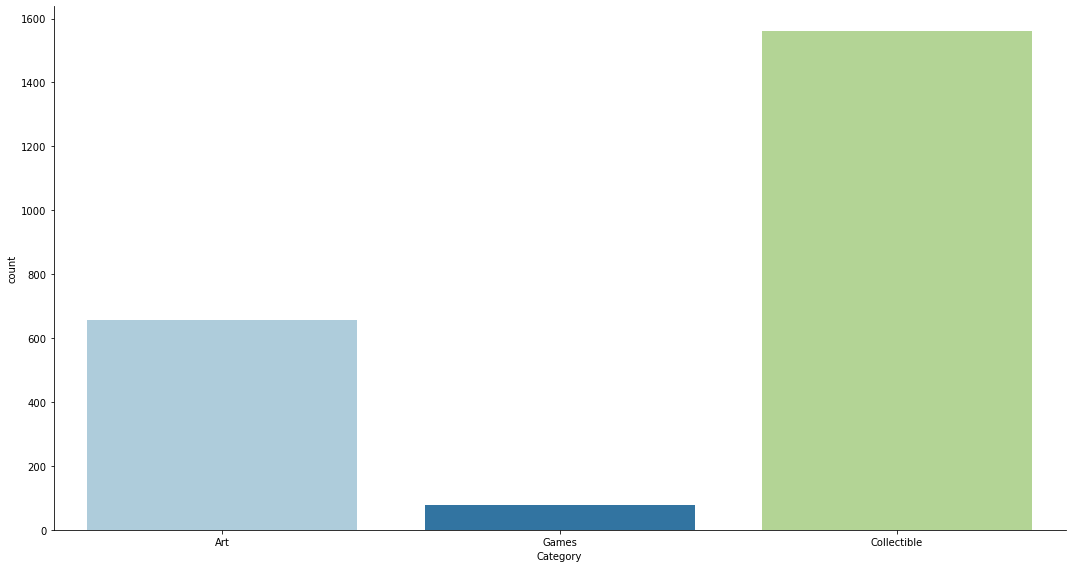

In [74]:
sns.catplot(x="Category", kind="count", data=washed_nft, height=8, aspect=15/8)

<AxesSubplot:xlabel='Datetime_updated'>

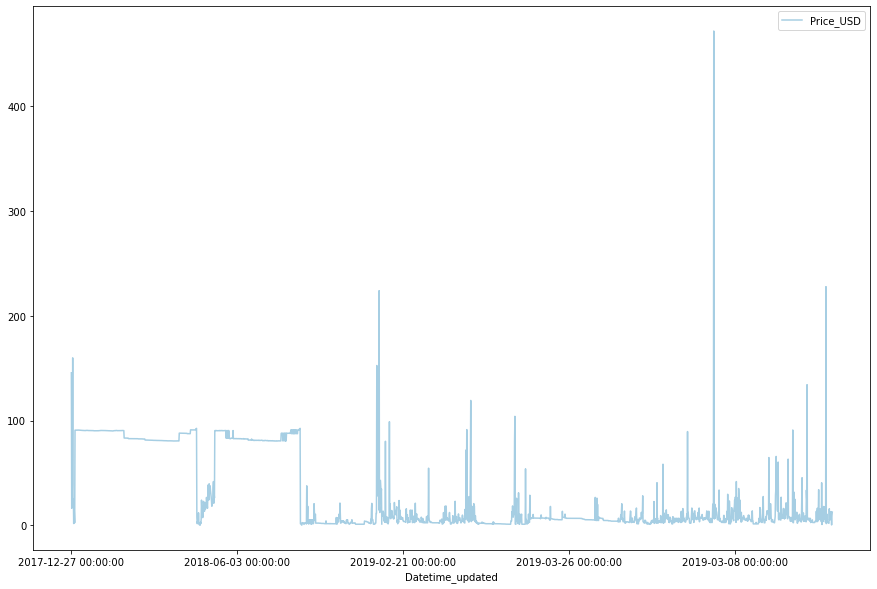

In [72]:
washed_nft.plot( 'Datetime_updated' , 'Price_USD', figsize=(15, 10) )

<AxesSubplot:xlabel='Datetime_updated'>

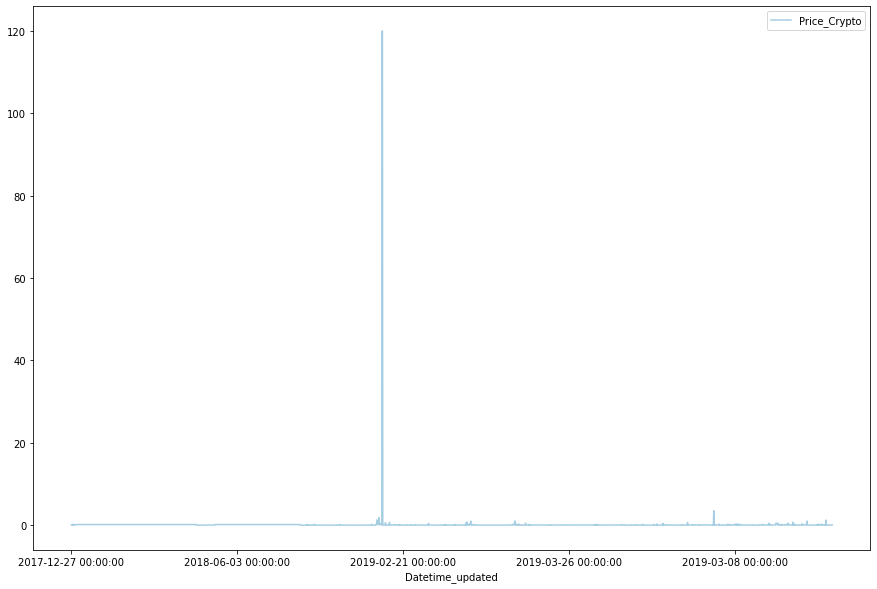

In [73]:
washed_nft.plot( 'Datetime_updated' , 'Price_Crypto', figsize=(15, 10) )